In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os,sys,inspect,pickle,json,time,datetime,re; root = os.path.dirname(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))))
import random as rn
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
root

TARGET = 'activity'
DATA_DIR = 'activity-atactic'
INPUT_FOLDER = 'v02_add55x5x3roll' # 'v01_original_clean'##'v00_original'
EXTRA_DATA1 = 'v00_original\\activity_test_timestamps.csv'

# load
train_data = pickle.load(open(os.path.join(root,'input',DATA_DIR,INPUT_FOLDER,'train.pkl'),"rb"))
test_data  = pickle.load(open(os.path.join(root,'input',DATA_DIR,INPUT_FOLDER,'test.pkl'),"rb"))
extra_data1 = pd.read_csv(os.path.join(root,'input',DATA_DIR,EXTRA_DATA1), index_col="date", parse_dates=["date"])
print('train_data',train_data.shape, 'test_data',test_data.shape, 'extra_data1',extra_data1.shape)#, 'atactic_test_target',atactic_test_target.shape,time.time()-tic,'sec')
ac_tags = pd.read_csv('activity_tags.csv',delimiter=';')
def feat_desc(fname): desc = ac_tags[ac_tags.feature==fname][['description','units']].values[0]; return desc[0] + ', ' + desc[1]
feat_desc('f23')

train_data (300737, 881) test_data (85891, 880) extra_data1 (85891, 0)


'Расход ТЭА к R2, л/c'

# by month

In [2]:
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

# curr_data = train_data
# col1='f17'
# col2='activity'

# fig, axarr = plt.subplots(10, 2, figsize=(12, 10))
# for mon in ['02','03','04','05','06','07','08','09','10']: # range(3,9):
#     #axarr[int(mon)-2][0].plot(curr_data[col1]["2018-"+mon+"-01 08:30:00":"2018-"+str((int(mon)+1)).zfill(2)+"-01 08:30:00"], label=col1+mon)
#     axarr[int(mon)-2][0].plot(curr_data[col1]["2018-"+mon+"-01 08:30:00":"2018-"+str((int(mon)+0)).zfill(2)+"-07 08:30:00"], label=col1+mon)
#     axarr[int(mon)-2][0].legend(loc="upper right")
#     #axarr[int(mon)-2][1].plot(curr_data[col2]["2018-"+mon+"-01 08:30:00":"2018-"+str((int(mon)+1)).zfill(2)+"-01 08:30:00"], label=col2+mon)
#     axarr[int(mon)-2][1].plot(curr_data[col2]["2018-"+mon+"-01 08:30:00":"2018-"+str((int(mon)+0)).zfill(2)+"-07 08:30:00"], label=col2+mon)
#     axarr[int(mon)-2][1].legend(loc="upper right")        
# plt.show()

# custom range

In [3]:
# feature groups
rashod_r1 = ['f2','f3','f4','f5','f20','f22'] ;calalysts_r1 = ['f3','f4','f5','f22']
inside_r1_triple = ['f17','f25','f29','f32','f46','f47','f41']
inside_r1_double = ['f7','f8','f9']
inside_r1_unique = ['f39']

rashod_r2 = ['f10','f11','f12','f13','f21','f23']
inside_r2_triple = ['f18','f26','f31','f34','f51','f52','f50']
inside_r2_double = ['f14','f15','f16']

inside_r3_triple = ['f19','f27','f30','f33','f48','f49','f45']
inside_r3_unique = ['f36','f40']

weights = ['f53','f54','f55']
weather = ['f42','f43','f44']
temps_pro_wat_d219 = ['f1','f24','f38']
pressures_pro_az_etil = ['f6','f35','f37']
donor_in_nefras_level = ['f0']
bad = ['f28']
stars = ['f17','f18','f39','f50','f41','f38','f40','f45','f19'] # pred from activity gives e-2
rects = ['f52','f51','f46','f47','f48','f49','f36'] # pred from activity gives e-1

# groups of groups
rashod_r1_r2 = rashod_r1 + rashod_r2
inside_r1_r2 = inside_r1_triple + inside_r1_double + inside_r1_unique + inside_r2_triple + inside_r2_double
inside_r3 = inside_r3_triple + inside_r3_unique
unknown = weights + weather + temps_pro_wat_d219 + pressures_pro_az_etil + donor_in_nefras_level
together = rashod_r1_r2 + inside_r1_r2 + inside_r3 + unknown
#original_features = train_data_orig.columns.tolist(); original_features.remove(TARGET_ORIG)

features_groups = ['rashod_r1','calalysts_r1','inside_r1_triple','inside_r1_double','inside_r1_unique','rashod_r2','inside_r2_triple','inside_r2_double','inside_r3_triple','inside_r3_unique','weights','weather','temps_pro_wat_d219','pressures_pro_az_etil','donor_in_nefras_level','bad','stars','rects','rashod_r1_r2', 'inside_r1_r2', 'inside_r3', 'unknown', 'together']

# many rows

In [4]:
# features_l = rashod_r1 #['f2','f3','f4','f5','f6','f7']
# features_r = inside_r1_triple #['f2','f3','f4','f5','f6','f7']
# curr_data = train_data
# START = "2018-05-12 14:01:00"
# STOP = "2018-05-12 15:01:00"
# rows = max(len(features_l),len(features_r))

# cols = 2
# fig, axarr = plt.subplots(rows, cols, figsize=(12, rows*2))
# def plot_axarr(feat, i, j):
#     axarr[i][j].plot(curr_data[feat][START:STOP], label=feat + ',' + feat_desc(feat))
#     axarr[i][j].legend(loc="upper right")
# for i,f in enumerate(features_l): plot_axarr(f,i,0)
# for i,f in enumerate(features_r): plot_axarr(f,i,1)

# plt.show()

# one row

In [5]:
print(features_groups)

['rashod_r1', 'calalysts_r1', 'inside_r1_triple', 'inside_r1_double', 'inside_r1_unique', 'rashod_r2', 'inside_r2_triple', 'inside_r2_double', 'inside_r3_triple', 'inside_r3_unique', 'weights', 'weather', 'temps_pro_wat_d219', 'pressures_pro_az_etil', 'donor_in_nefras_level', 'bad', 'stars', 'rects', 'rashod_r1_r2', 'inside_r1_r2', 'inside_r3', 'unknown', 'together']


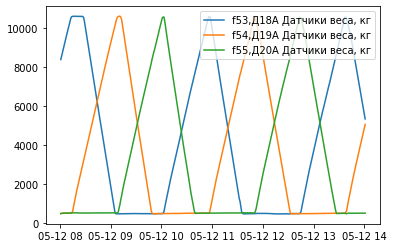

In [6]:
features = ['f53','f54','f55']#calalysts_r1#rashod_r1['f2']#['activity']
curr_data = train_data
START = "2018-05-12 08:01:00"
STOP = "2018-05-12 14:01:00"

fig, axarr = plt.subplots()
for feat in features:
    axarr.plot(curr_data[feat][START:STOP], label=feat + ',' + feat_desc(feat))
    axarr.legend(loc="upper right")

plt.show()

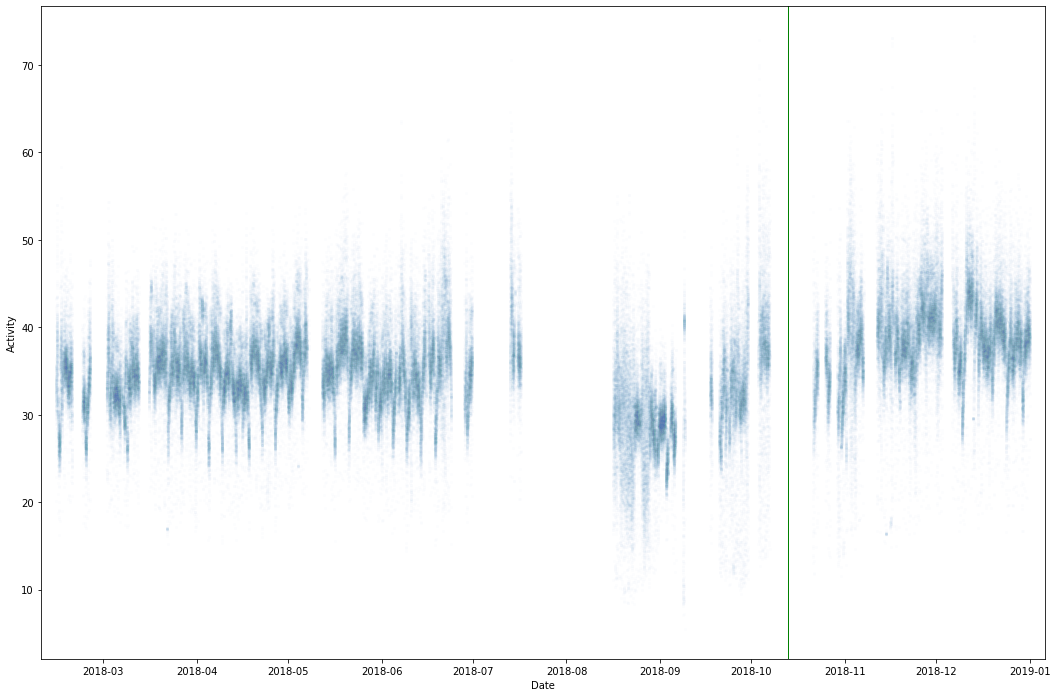

In [7]:
import seaborn as sns
features = ['f53']#['activity']
curr_data = train_data
START = "2018-05-12 08:01:00"
STOP = "2018-05-12 14:01:00"

plt.figure(figsize=(18,12))
sns.scatterplot(
    data=curr_data, x=curr_data.index, 
    y='activity', 
    alpha=0.01, s=10
)
plt.axvline('2018-10-13', c='green', linewidth=1)
plt.xlabel('Date'); plt.ylabel('Activity')
plt.xlim(
    curr_data.index.min() - datetime.timedelta(days=5),
    curr_data.index.max() + datetime.timedelta(days=5));

In [8]:
# import seaborn as sns
# features = ['f53']#['activity']
# curr_data = train_data
# START = "2018-05-12 08:01:00"
# STOP = "2018-05-12 14:01:00"
# #sns.kdeplot(curr_data['f53'][START:STOP])
# sns.lineplot(x=curr_data[START:STOP].index, y=curr_data['f53'][START:STOP], data=df)

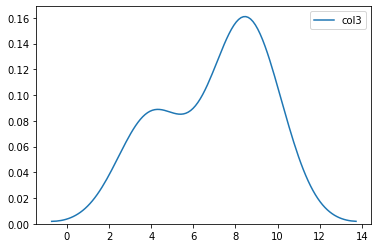

In [9]:
import seaborn as sns
import pandas as pd
ser1 = pd.Series({'col1': 'vlg34ru25ua', 'col2': 34, 'col3': 4, 'col4': 2,})                #           col1            col2    col3    col4
ser2 = pd.Series({'col1': 'msk',         'col2': 99, 'col3': 9, 'col4': 2,})                # index1    vlg34ru25ua     34      4       2
ser3 = pd.Series({'col1': 'spb',         'col2': 98, 'col3': 8, 'col4': 2,})                # index2    msk             99      9       2
df = pd.DataFrame([ser1, ser2, ser3], index=['index1', 'index2', 'index3'])                 # index3    spb             98      8       2

#sns.kdeplot(df.query('col2 > 30').col3)
sns.kdeplot(df.col3)


# by hour

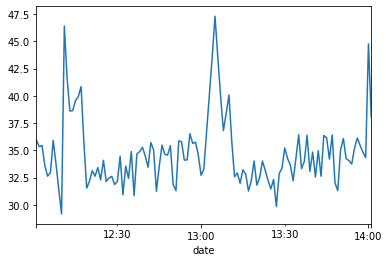

In [10]:
start = "2018-05-12 12:01:00"
stop = "2018-05-12 14:01:00"
train_data['activity'][start:stop].plot() # ['f3','f4','f5','f22'] 12 and 19 feb - monday


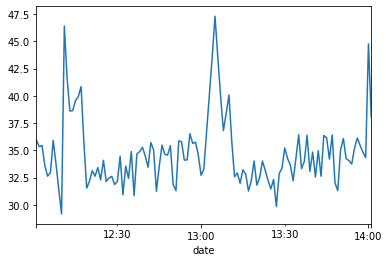

In [11]:
train_data['activity'][start:stop].plot() # 12 and 19 feb - monday
